In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

## Simulation setup

#### Simulation setup

In [2]:
sim = rw.Simulation()

start simulation


#### Source 

In [3]:
nr_particles = 1*10**3
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
delta_rho_div_phi = 1 #1/2**0.5 # (delta_r_rho / delta_r_phi)
energy = 3*10**15 # eV
phi = 0.0
pitch_angle = 2*np.pi * 54.74/360 # pitch angle for equal components in all directions
        

source = rw.PointSourceIsotropic(energy, source_pos, nr_particles)
sim.add_source(source)
sim.source.get_description()

Description Source:
                The source defines the start conditions of the particles 
                and covers the position, direction, energy, etc

position:  [0. 0. 0.]
number particles:  1000
energy:  3000000000000000  eV
source tpye: PointSourceIsotropic


#### Propagator

In [4]:
nr_steps = 2*10**4
step_size = 0.5*10**10 # [m]
mfp = np.array([2.13*10**12/2.0, 2.13*10**12/2.0, 2.1078*10**12], dtype=np.float32)  # [m]
rms = 1 # Gaus
magnetic_field = rw.OrderedBackgroundField(rms, [0,0,1]).magnetic_field

propagator = rw.AnisotropicPropagator(magnetic_field, mfp, nr_steps, step_size)
#propagator.set_pitch_angle_const(False)
sim.add_propagator(propagator)
sim.propagator.get_description()

Propagator initialized
Description Propagator:
                The propagator is responsible for the movement of the particles. 
                It performs the change of direction and the movement in the respective direction.
                There are two phases:
                 - change direction with probability (see below)
                 - move in all directions
                The movement takes place according to the random walk (RW).

propagation tpye: AnisotropicPropagator
Description Propagator:
                The propagator is responsible for the movement of the particles. 
                It performs the change of direction and the movement in the respective direction.
                There are two phases:
                 - change direction with probability (see below)
                 - move in all directions
                The movement takes place according to the random walk (RW).

coordinates: Cylindrical coordinates
dimensions:  3
pitch angle: constant
particle sp

#### Observer

In [5]:
substeps = [False, False, True] # observe only steps (no substeps)
spheres = [1*10**13, 5*10**12]

observer = rw.SphericalObserver(substeps, spheres)

sim.add_observer(observer)
sim.observer.get_description()

number steps:  0
Observer initialized
Description Observer:
                The observer defines the conditions for when to write data to the output.

observer tpye: SphericalObserver
spheres:  [-1.e+00  1.e+13  5.e+12]
steps [0:10]:  []
steps [-11:-1]:  []
nr steps:  0
substeps:  [False False  True]
all_steps:  False


In [6]:
%time sim.run_simulation()
sim.save_data('data/data_sim')

CPU times: user 37.8 s, sys: 26.3 ms, total: 37.8 s
Wall time: 37.8 s


## Analyze statistics


In [7]:
df = pd.read_pickle("data/data_sim.pkl")
df

,id,i,d,x,y,z,phi,pitch_angle,radius,sub_step
0,0.0,1003.0,5.651675e+12,-2.889881e+11,-3.287367e+10,-4.993355e+12,140.899948,3.234529,5.000000e+12,2.0
1,0.0,2452.0,1.381686e+13,-2.543425e+11,5.599217e+10,-9.996887e+12,142.188461,3.234529,1.000000e+13,2.0
2,0.0,5710.0,3.217041e+13,2.173142e+11,4.490303e+11,-9.986929e+12,137.284164,3.234529,1.000000e+13,2.0
3,0.0,6536.0,3.682323e+13,2.210315e+11,5.475601e+11,-9.986929e+12,139.759018,3.234529,1.000000e+13,2.0
4,0.0,7854.0,4.424746e+13,-3.333271e+09,6.583992e+11,-9.976972e+12,134.593613,3.234529,1.000000e+13,2.0
...,...,...,...,...,...,...,...,...,...,...
6769,998.0,5768.0,4.967224e+13,5.039210e+11,-5.742849e+11,9.971382e+12,29.795042,5.434243,1.000000e+13,2.0
6770,998.0,8169.0,7.035710e+13,5.889137e+11,-1.024785e+11,9.981294e+12,-30.328459,5.434243,1.000000e+13,2.0
6771,998.0,10837.0,9.331982e+13,3.871501e+11,-5.015692e+11,9.981294e+12,78.436554,5.434243,1.000000e+13,2.0
6772,998.0,11789.0,1.015134e+14,4.540361e+11,-3.427539e+11,9.981294e+12,63.371803,5.434243,1.000000e+13,2.0


10000000000000
[4.99999991e+12 9.99999983e+12]


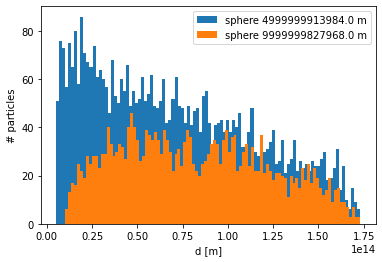

In [8]:
print(spheres[0])
spheres = df['radius'].unique()
print(spheres)
for sphere in spheres:
    df_sphere = df.loc[df['radius'] == sphere]
    plt.hist(df_sphere['d'], bins = 100, label='sphere '+str(sphere)+' m')
    
plt.xlabel('d [m]')
plt.ylabel('# particles')
plt.legend()
plt.show()